In [11]:
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime

In [2]:
df = pd.read_csv('data/Sales_Product_Price_by_Store.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['weekly_sales'] = df['Price'] * df['Weekly_Units_Sold']

In [6]:
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales
0,1,1,2010-02-05,False,9.99,7.99,245,1957.55
1,1,1,2010-02-12,True,9.99,7.99,453,3619.47
2,1,1,2010-02-19,False,9.99,7.99,409,3267.91
3,1,1,2010-02-26,False,9.99,7.99,191,1526.09
4,1,1,2010-03-05,False,9.99,9.99,145,1448.55


In [7]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

In [8]:
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year
Date,,,,,,,,,,,
2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5
2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6
2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7
2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8
2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,3861.0,5.111111,2.767003,1.00,3.00,5.00,7.00,10.00
Product,3861.0,2.000000,0.816602,1.00,1.00,2.00,3.00,3.00
Base Price,3861.0,12.554103,6.079043,5.99,6.99,10.99,19.99,21.99
Price,3861.0,11.766084,5.976196,4.01,5.99,10.00,19.99,21.99
Weekly_Units_Sold,3861.0,215.952603,236.273397,13.00,69.00,130.00,278.00,2557.00
weekly_sales,3861.0,1896.054685,1789.384621,229.77,778.70,1476.72,2330.11,25570.00
year,3861.0,2010.965035,0.797061,2010.00,2010.00,2011.00,2012.00,2012.00
month,3861.0,6.447552,3.238476,1.00,4.00,6.00,9.00,12.00
day,3861.0,15.678322,8.756234,1.00,8.00,16.00,23.00,31.00
week_of_year,3861.0,25.818182,14.129933,1.00,14.00,26.00,38.00,52.00


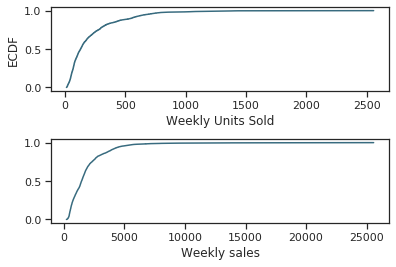

In [28]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(df['Weekly_Units_Sold'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Units Sold'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(df['weekly_sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');

Although in the best week, a store has sold more than 2500 units, about 80% of the time, weekly units sold did not exceed 500.
Although the highest weekly sales has exceeded 25K dollars, over 90% of the data had weekly sales less than 5K dollars.

In [101]:
df.groupby('Store')['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


In [102]:
df.groupby('Store')['Weekly_Units_Sold'].sum()

Store
1      86699
2     121465
3      31689
4     158718
5      27300
6      97698
7      44027
8      65273
10    200924
Name: Weekly_Units_Sold, dtype: int64

Based on the above simple analysis, it is easy to see that Store 10 has the highest average weekly sales among all 9 stores, also Store 10 has the most total weekly units sold. And Store 5 has the lowest average of weekly sales. Apparently, Store 10 is the most selling and crowded one.

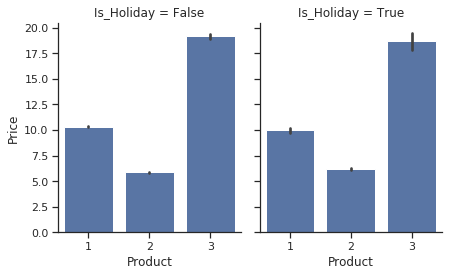

In [48]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price");

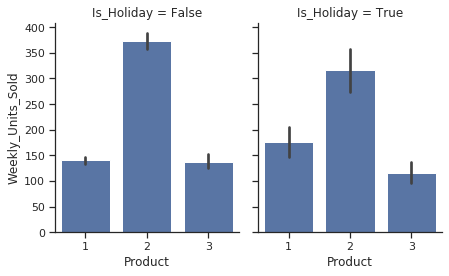

In [49]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Units_Sold");

Product 2 is the cheapest product among these three products, so, it sells the most. Product 3 is the most expensive product among these three. Product price did not change during holidays.

Because we have recorded holidays sales, so we want to analyze if holiday contributed to the sales.

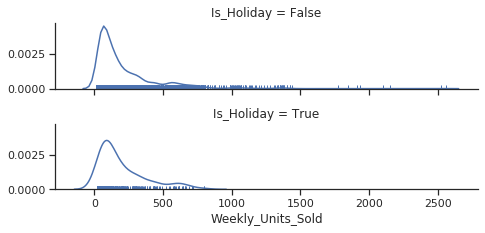

In [42]:
g = sns.FacetGrid(df, row="Is_Holiday",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Weekly_Units_Sold", hist=False, rug=True);

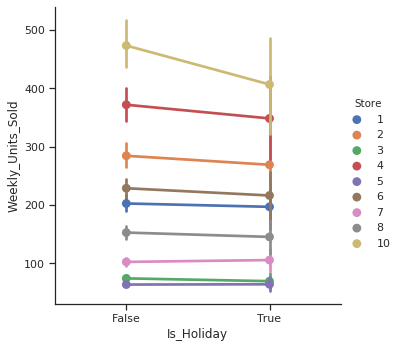

In [37]:
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

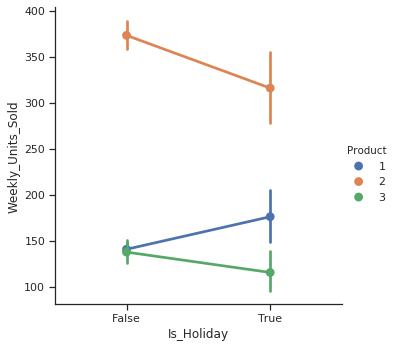

In [38]:
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Product');

It does not seem that holidays have a positive impact for the business. For most of the stores, weekly unit sold during the holiday is as same as the normal days, while store 10 had a decrease during the holidays.

Weekly units sold for product 1 had a slightly increase during the holidays, while product 2 and product 3 had a decrease during the holidays. 

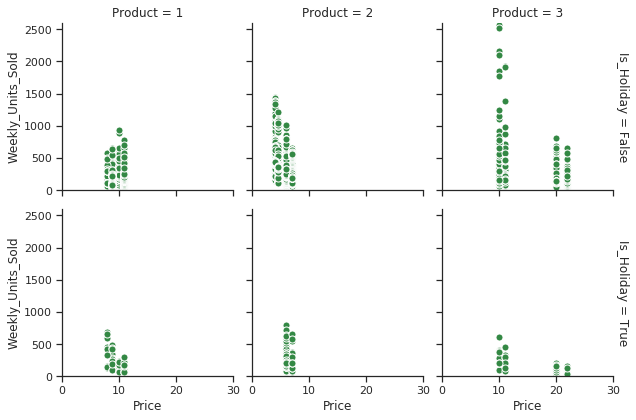

In [57]:
g = sns.FacetGrid(df, col="Product", row="Is_Holiday", margin_titles=True, height=3)
g.map(plt.scatter, "Price", "Weekly_Units_Sold", color="#338844", edgecolor="white", s=50, lw=1)
g.set(xlim=(0, 30), ylim=(0, 2600));

Every product has more than one prices,both in holidays and normal days. I guess one is regular price, another is promotional price. However, the price gap for product 3 is huge, it was slashed to almost 50% off during promotions.

Product 3 made the most sales during non-holidays .

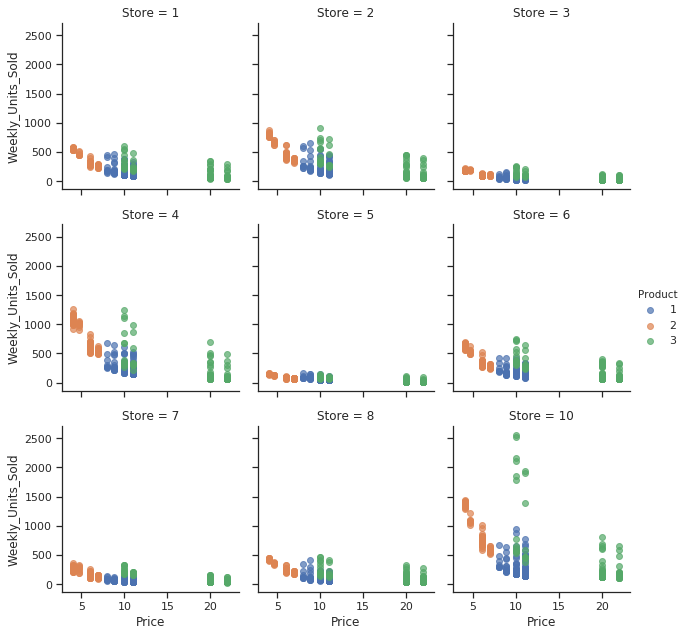

In [50]:
g = sns.FacetGrid(df, col="Store", hue="Product", margin_titles=True, col_wrap=3)
g.map(plt.scatter, 'Price', 'Weekly_Units_Sold', alpha=.7)
g.add_legend();

All of these 9 stores carry these three products, they all seem to have similar kind of discount promotions. However, product 3 sells the most units during promotion at store 10.

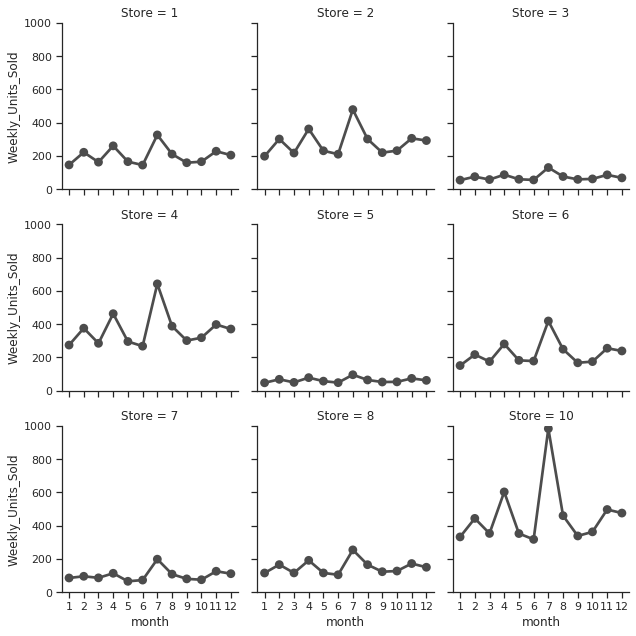

In [51]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

Every store has somewhat seasonality, store 10 has the most obvious seasonal pattern.

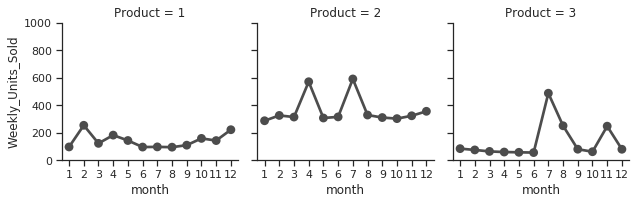

In [58]:
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

Every product has somewhat seasonality, product 3 has the most obvious seasonal pattern.

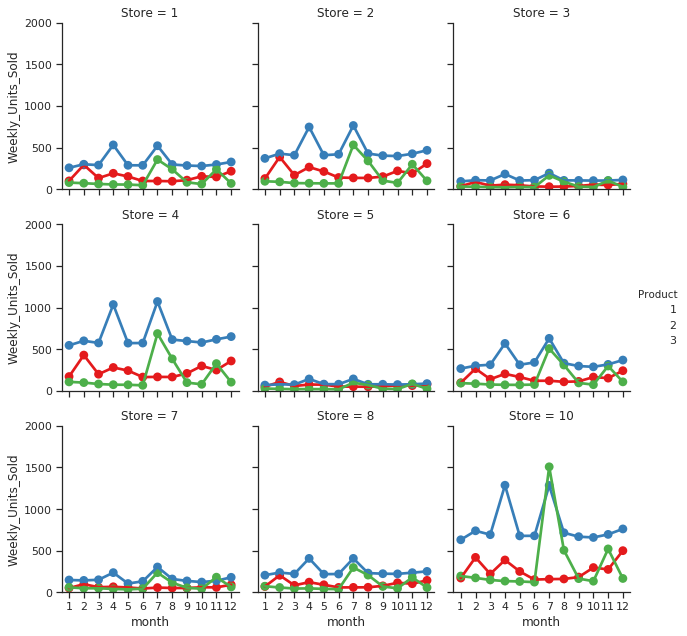

In [59]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 2000), hue='Product', palette="Set1")
g.map(sns.pointplot, "month", "Weekly_Units_Sold", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

In general, Produt 2 sells the most units at Store 10. Once a while, Product 3 would exceed product 2.

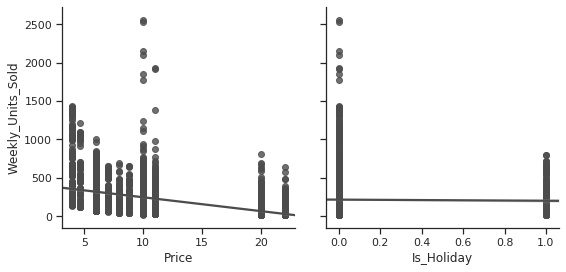

In [66]:
g = sns.PairGrid(df, y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday"], height=4)
g.map(sns.regplot, color=".3");

The cheaper the price, the more weekly units were sold. Is holiday or not has nothing to do with the unit sold. 

In [69]:
def f(row):
    if row['Base Price'] == row['Price']:
        val = 0
    elif row['Base Price'] > row['Price']:
        val = 1
    else:
        val = -1
    return val
df['promotion'] = df.apply(f, axis=1)

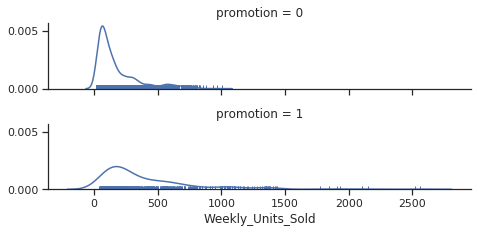

In [76]:
g = sns.FacetGrid(df, row="promotion",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Weekly_Units_Sold", hist=False, rug=True);

It is obvious that weekly units sold are higher during the promotions.

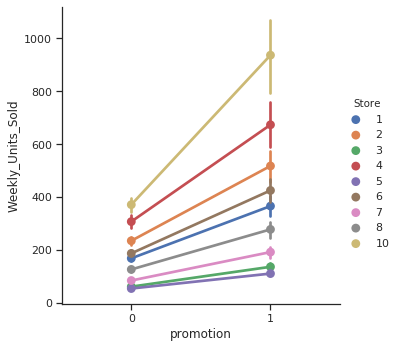

In [78]:
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

Every store sells more during the promotion, there is no exception.

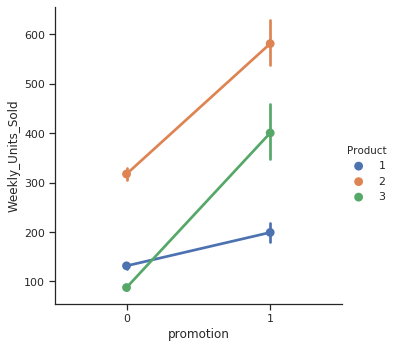

In [79]:
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Product');

Every product sells more during the promotion, in particular, product 2 and product 3.

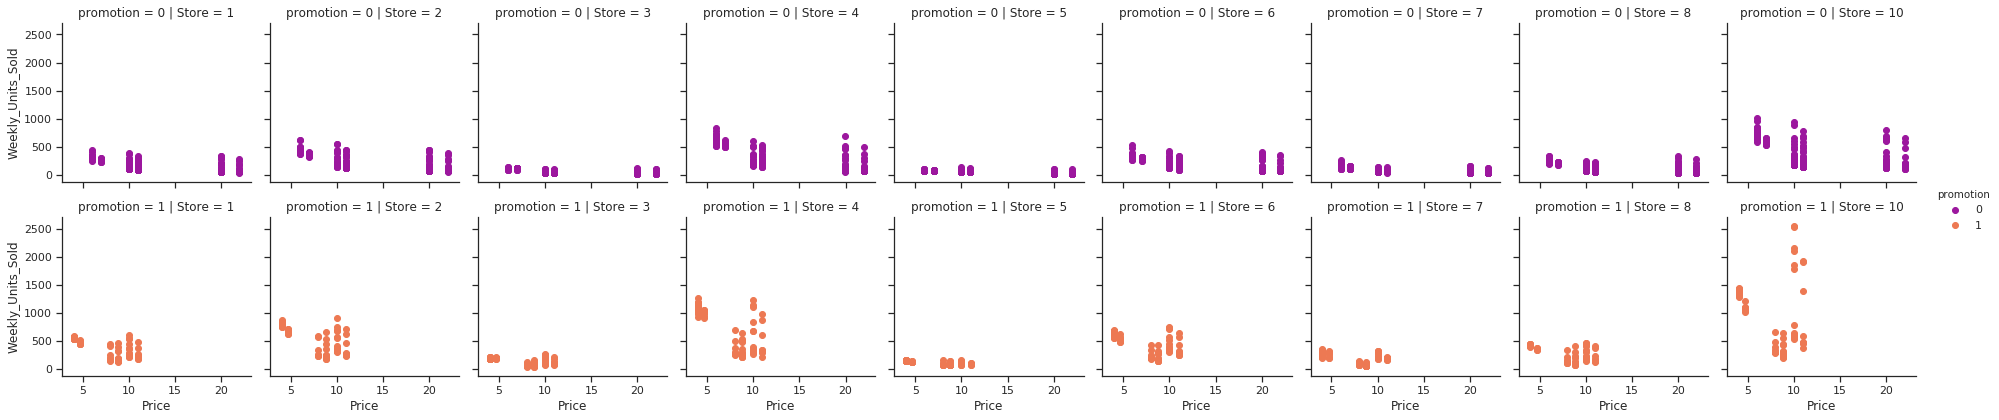

In [77]:
g = sns.FacetGrid(df, col="Store", hue="promotion", palette = 'plasma', row='promotion')
g = (g.map(plt.scatter, "Price", "Weekly_Units_Sold")
     .add_legend())

All the stores have the similar price promotion pattern, for some reason, Store 10 sells the most during the promotions.

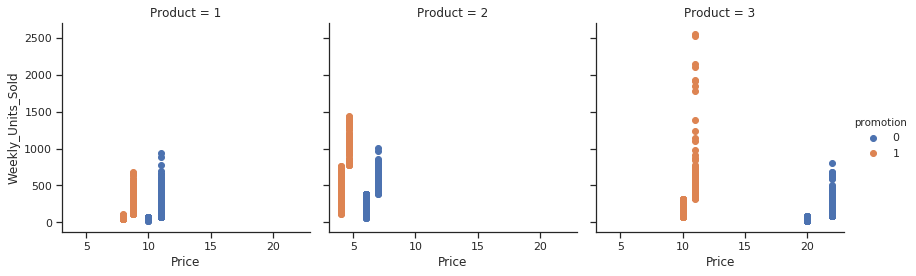

In [69]:
g = sns.FacetGrid(df, hue="promotion", col="Product", height=4)
g.map(qqplot, "Price", "Weekly_Units_Sold")
g.add_legend();

All the products have the regular price and promotion price. Poduct 3 has the highest discount and sells the most during the promotions.

In [104]:
df.groupby(['Product', 'promotion'])['Price', 'Weekly_Units_Sold'].mean()

Price  Weekly_Units_Sold
Product promotion                              
1       0          10.653866         131.637722
        1           8.523333         199.171296
2       0           6.294348         317.388406
        1           4.201429         581.099206
3       0          20.700744          87.748393
        1          10.409091         400.484848

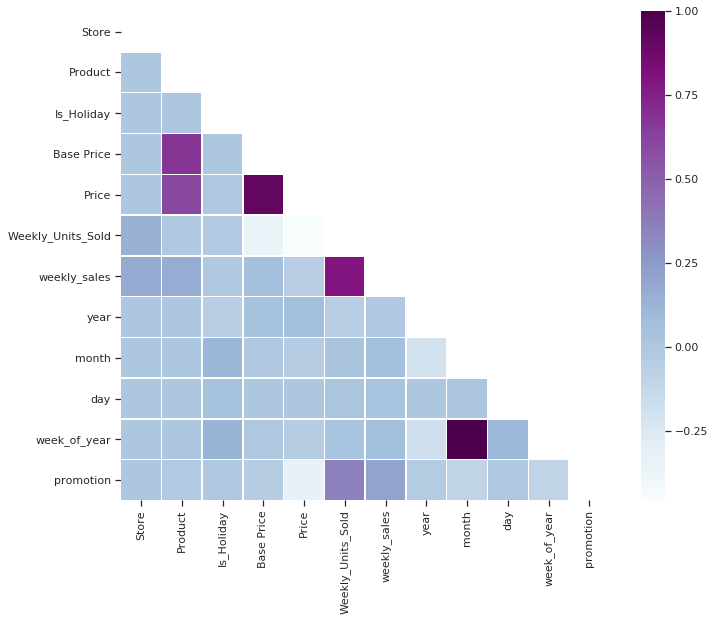

In [80]:
corr_all = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show();

We have a strong positive correlation between price and Base price, weekly units sold and weekly sales, base price and product, price and product. We can also observe a positive correlation between month and week of the year.

*Observations*

* The most selling and crowded Store is Store 10, and the least crowded store is Store 5.
* In terms of number of units sold, the most selling product is product 2. In terms of sales dollars, Product 3 postd the highest sales during normal days. 
* Stores do not necessarily run product promotions during holidays. Holidays do not seem to have an impact on Stores' performance.
* Product 1 sells a little more during holidays, however, Product 2 and Product 3 sell less on holidays.
* Product 2 seems to be the cheapest product, and Product 3 is the most expensive product.
* Most stores have some kind of seasonality and they make the highest sales around July.
* Product 1 sells a little more in February than the other months, Product 2 sells the most around April and July, and Product 3 sells the most around July.
* In general, prodct 2 sells the most at Store 10, but in July, Product 3 has the highest sales in this store.
* Each product has its regular price and promotional price. There isn't significant gap between regular price and promotional price on Product 1 and Product 2, however, Product 3's promotional price can be slashed to 50% of its original price. Although every store makes this kind of price cut for product 3, Store 10 is the one made the highest sales during the price cut.  
* It is nothing unusual to sell more during promotion than the normal days. Store 10's made Product 3 the best selling product around July.

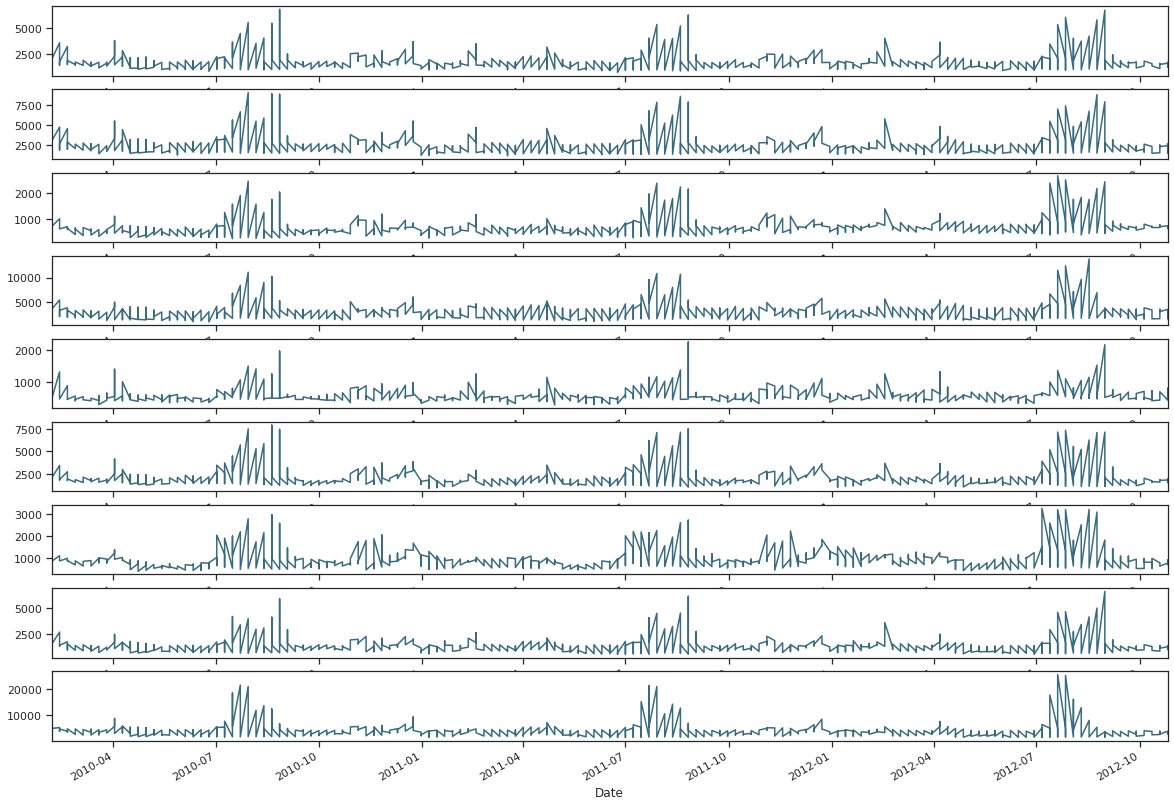

In [81]:
# store types
sales_1 = df[df.Store == 1]['weekly_sales']
sales_2 = df[df.Store == 2]['weekly_sales']
sales_3 = df[df.Store == 3]['weekly_sales']
sales_4 = df[df.Store == 4]['weekly_sales']
sales_5 = df[df.Store == 5]['weekly_sales']
sales_6 = df[df.Store == 6]['weekly_sales']
sales_7 = df[df.Store == 7]['weekly_sales']
sales_8 = df[df.Store == 8]['weekly_sales']
sales_10 = df[df.Store == 10]['weekly_sales']

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, figsize = (20, 15))

# store types
sales_1.plot(color = c, ax = ax1)
sales_2.plot(color = c, ax = ax2)
sales_3.plot(color = c, ax = ax3)
sales_4.plot(color = c, ax = ax4)
sales_5.plot(color = c, ax = ax5)
sales_6.plot(color = c, ax = ax6)
sales_7.plot(color = c, ax = ax7)
sales_8.plot(color = c, ax = ax8)
sales_10.plot(color = c, ax = ax9);

Time series

In [105]:
store_10_pro_3 = df[(df.Store == 10) & (df.Product == 3)].loc[:, ['Base Price', 'Price', 'Weekly_Units_Sold', 'weekly_sales']]
store_10_pro_3.reset_index(level=0, inplace=True)
fig = px.line(store_10_pro_3, x='Date', y='weekly_sales')
fig.update_layout(title_text='Time Series of weekly sales')
fig.show()

In [106]:
store_10_pro_3 = store_10_pro_3[['Date', 'weekly_sales']].rename(columns = {'Date': 'ds',
                                'weekly_sales': 'y'})

In [107]:
model = Prophet(interval_width = 0.95)
model.fit(store_10_pro_3)
 
future_dates = model.make_future_dataframe(periods = 50, freq='W')

future_dates.tail(7)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
186,2013-08-25
187,2013-09-01
188,2013-09-08
189,2013-09-15
190,2013-09-22
191,2013-09-29
192,2013-10-06


In [108]:
forecast = model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
186,2013-08-25,7160.453669,4742.937710,9559.615673
187,2013-09-01,5542.434739,3249.762712,7887.321785
188,2013-09-08,3702.168377,1355.902566,5824.555193
189,2013-09-15,2427.279755,189.552142,4693.158976
190,2013-09-22,2386.972428,7.973471,4673.053027
191,2013-09-29,3020.451351,759.252236,5227.695107
192,2013-10-06,3157.655085,756.079499,5603.923897


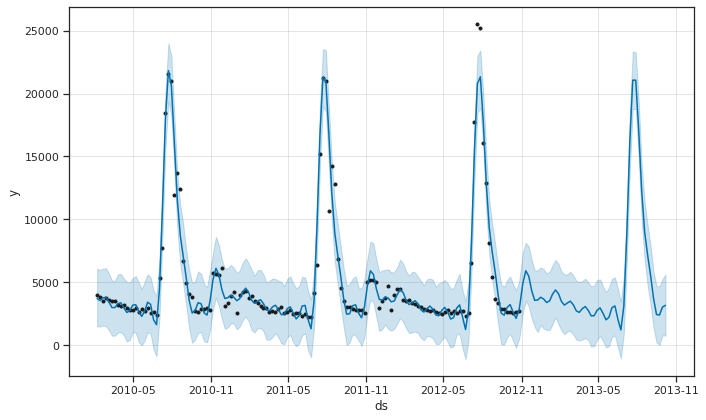

In [109]:
model.plot(forecast);

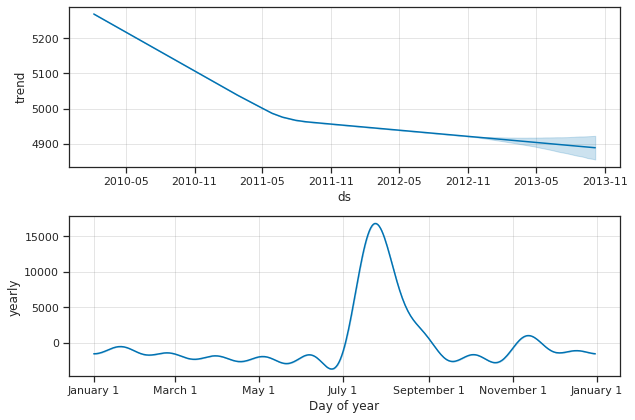

In [110]:
model.plot_components(forecast);

In [111]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1190.0962582193933


Add seasonality effect.

In [112]:
def is_school_holiday_season(ds):    
    date = pd.to_datetime(ds)
    starts = datetime.date(date.year, 7, 1)
    ends = datetime.date(date.year, 9, 9)
    return starts < date.to_pydatetime().date() < ends

store_10_pro_3['school_holiday_season'] = store_10_pro_3['ds'].apply(is_school_holiday_season)
store_10_pro_3['not_school_holiday_season'] = ~store_10_pro_3['ds'].apply(is_school_holiday_season)
model = Prophet(interval_width=0.95)

In [94]:
model.add_seasonality(name='school_holiday_season', period=365, fourier_order=3, condition_name='school_holiday_season')
model.add_seasonality(name='not_school_holiday_season', period=365, fourier_order=3, condition_name='not_school_holiday_season')
model.fit(store_10_pro_3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
forecast = model.make_future_dataframe(periods=50, freq='W')
forecast['school_holiday_season'] = forecast['ds'].apply(is_school_holiday_season)
forecast['not_school_holiday_season'] = ~forecast['ds'].apply(is_school_holiday_season)

In [96]:
forecast = model.predict(forecast)

<Figure size 720x360 with 0 Axes>

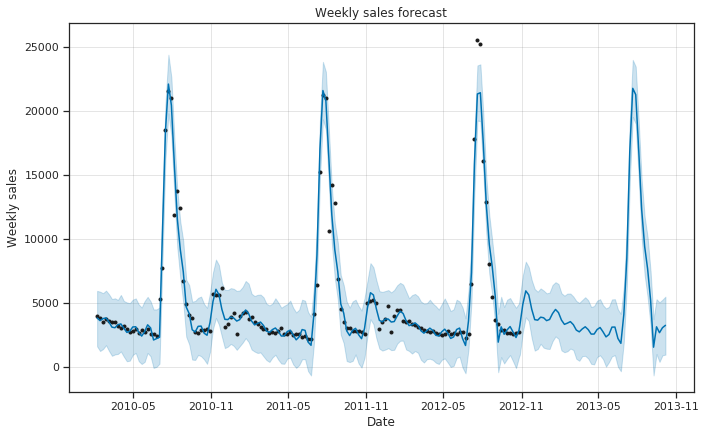

In [97]:
plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'Weekly sales')
plt.title('Weekly sales forecast');

In [98]:
metric_df = forecast.set_index('ds')[['yhat']].join(store_10_pro_3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(sqrt(error)))

The RMSE is 1127.4109974735834


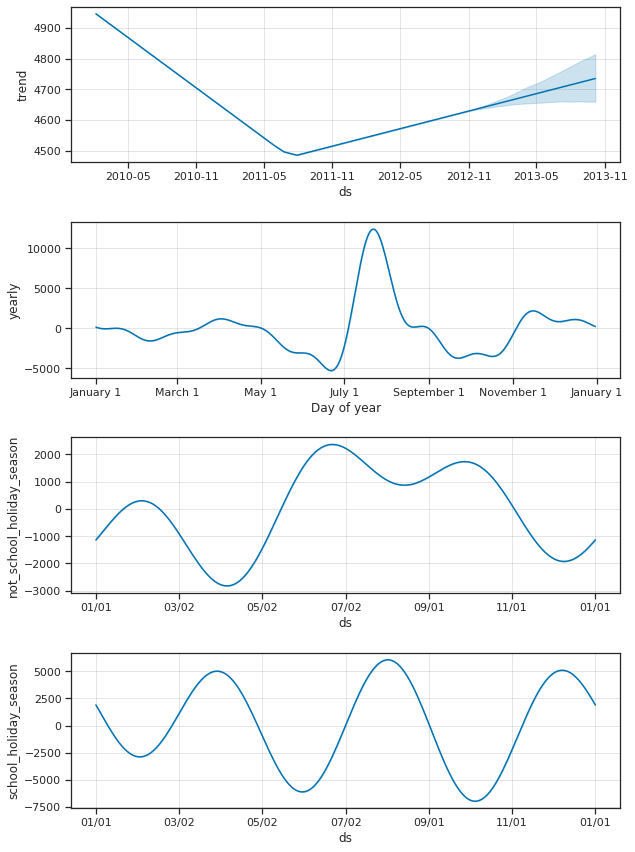

In [99]:
model.plot_components(forecast);